In [6]:
import sys
# sys.path.append("../")
sys.path.append("/home/abhik/696-ds/Source/systemrl/environments/")
import numpy as np
from gridworld import Gridworld


#Actions: up (0), down (1), left (2), right (3), do nothing (4)
(u,d,l,r) = (0, 1, 2, 3)
human_policy = [
        r, d, r, d, l,
        r, d, r, d, l,
        r, d, l, d, d,
        r, d, d, d, d, 
        r, r, r, r, d]

np.random.seed(0)
startState=0
endStates=[24]
shape=[5,5]
obstacles=[]
waterStates=np.arange(1,24)
waterRewards=[-1,-1,-1,-5,-9,-3,-4,-1,-6,-5,-1,-1,-1,-2,-6,-1,-8,-4,-5,-7,-1,-1,-1]

# expert = []
# for _ in range(10000):
#     env = Gridworld(startState, endStates, shape, obstacles, waterStates, waterRewards)
    
#     ep = []
#     i = 0
#     s = 0
#     while i<50:
#         a = human_policy[s]
#         s,reward,done = env.step(a)
#         ep.append([s, a, reward])
#         if done:
#             break
#         i+=1
#     # print(i)
#     ep = np.array(ep)
#     expert.append(ep)
# expert_np = np.array(expert)
# np.save("expert_demo/expert_demo", expert_np)
# print(expert_np.shape)

(25, 4)
(10000,)
0 episode score is -181.00
0 episode score is -181.00
500 episode score is -101.56
1000 episode score is -64.58
1500 episode score is -48.41
2000 episode score is -39.92
2500 episode score is -33.31
3000 episode score is -28.85
3500 episode score is -25.73
4000 episode score is -23.46
4500 episode score is -21.58
5000 episode score is -20.04
5500 episode score is -18.73
6000 episode score is -17.73
6000 episode score is -17.73


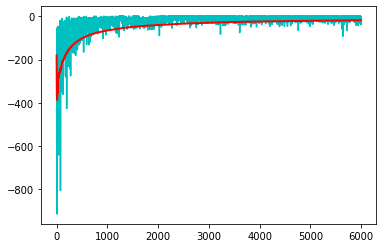

In [28]:
import gym
import pylab
import numpy as np
# from gridworld import Gridworld
import matplotlib.pyplot as plt
import sys

sys.path.append("/home/abhik/696-ds/Source/systemrl/environments/")
import numpy as np
from gridworld import Gridworld

from maxent import *

n_states = 25 
n_actions = 4
one_feature = 20 # number of state per one feature
q_table = np.ones((n_states, n_actions))*0.0001 # (400, 3)
print(q_table.shape)
feature_matrix = np.eye((n_states)) # (400, 400)

gamma = 1
q_learning_rate = 0.03
theta_learning_rate = 0.005

np.random.seed(1)

def idx_demo(env, one_feature):
    raw_demo = np.load(file="expert_demo/expert_demo.npy", allow_pickle = True)
    print(raw_demo.shape)
            
    return raw_demo

def idx_state(env, state):
    return state

def update_q_table(state, action, reward, next_state):
    q_1 = q_table[state][action]
    q_2 = reward + gamma * max(q_table[next_state])
    q_table[state][action] += q_learning_rate * (q_2 - q_1)
#     print(np.max(q_table))
    

# env = Gridworld()
np.random.seed(0)
startState=0
endStates=[24]
shape=[5,5]
obstacles=[]
waterStates=np.arange(1,24)
waterRewards=[-1,-1,-1,-5,-9,-3,-4,-1,-6,-5,-1,-1,-1,-2,-6,-1,-8,-4,-5,-7,-1,-1,-1]
env = Gridworld(startState, endStates, shape, obstacles, waterStates, waterRewards)


demonstrations = idx_demo(env, one_feature)

expert = expert_feature_expectations(feature_matrix, demonstrations)
learner_feature_expectations = np.zeros(n_states)

theta = -(np.random.uniform(size=(n_states,)))

episodes, scores = [], []
avg = []

n = 6000
for episode in range(n+1):
    env.reset()
    state = 0
    score = 0


    if (episode != 0 and episode == 50) or (episode > 50 and episode % 50 == 0):
        learner = learner_feature_expectations / episode
        maxent_irl(expert, learner, theta, theta_learning_rate)
        

    while True:
        state_idx = idx_state(env, state)
        action = np.argmax(q_table[state_idx])
        next_state, reward, done = env.step(action)

        irl_reward = get_reward(feature_matrix, theta, n_states, state_idx)
        next_state_idx = idx_state(env, next_state)
        update_q_table(state_idx, action, irl_reward, next_state_idx)

        learner_feature_expectations += feature_matrix[int(state_idx)]

        score += reward
        state = next_state

        if done:
            scores.append(score)
            episodes.append(episode)
            avg.append(np.mean(scores))
            break
            
    if episode%500==0:
        print('{} episode score is {:.2f}'.format(episode, np.mean(scores)))
        

    if episode % n == 0:
        score_avg = np.mean(scores)
        print('{} episode score is {:.2f}'.format(episode, score_avg))
        plt.plot(episodes, scores, "c")
        plt.plot(episodes, avg, "r", linewidth = 2)
        plt.savefig("./learning_curves/maxent_30000.png")
        np.save("./results/maxent_q_table", arr=q_table)
        np.save("./results/theta", arr=theta)

In [29]:
print(q_table)
print(np.max(q_table))

[[-7.50626842e+00 -7.52942893e+00 -7.49837261e+00 -7.22301681e+00]
 [-5.89558387e+00 -5.62797516e+00 -5.90155017e+00 -5.89258299e+00]
 [-5.96319494e+00 -5.97591928e+00 -5.96267590e+00 -5.92582705e+00]
 [-4.93265707e+00 -4.91155839e+00 -4.96733410e+00 -4.90804029e+00]
 [-4.02287422e+00 -3.99879402e+00 -4.00451475e+00 -4.01999142e+00]
 [-6.16643008e+00 -6.12256771e+00 -6.13346017e+00 -5.91733950e+00]
 [-4.87114050e+00 -4.53285959e+00 -4.82962772e+00 -4.83435535e+00]
 [-5.14086347e+00 -5.04752577e+00 -5.13953880e+00 -5.16768306e+00]
 [-4.25377076e+00 -4.24074986e+00 -4.28362215e+00 -4.23367522e+00]
 [-3.07983037e+00 -3.05334154e+00 -3.12253569e+00 -3.08006331e+00]
 [-5.29729932e+00 -5.21967886e+00 -5.25785140e+00 -5.27599324e+00]
 [-4.06231083e+00 -3.51762988e+00 -4.05413243e+00 -4.04570816e+00]
 [-3.89480123e+00 -3.71265559e+00 -3.86058245e+00 -3.85996164e+00]
 [-3.14471355e+00 -3.18418048e+00 -3.18299285e+00 -3.13862267e+00]
 [-2.18498112e+00 -2.13061916e+00 -2.18216892e+00 -2.17212878e

In [8]:
np.argmax(q_table, axis=1)

array([1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3,
       3, 3, 0])

In [10]:
(u,d,l,r) = (0, 1, 2, 3)
human_policy = [
        r, d, r, d, l,
        r, d, r, d, l,
        r, d, l, d, d,
        r, d, d, d, d, 
        r, r, r, r, d]

sum(1 for i in range(25) if np.argmax(q_table, axis=1)[i]==human_policy[i])

13

10

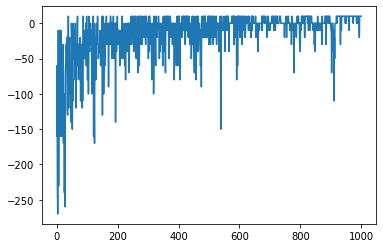

In [10]:
plt.plot(scores)
max(scores)

In [12]:
theta

array([-1.47812525, -0.4681118 , -0.88693129, -0.80595211, -0.73367406,
       -1.40169672, -0.19672408, -1.10875391, -1.09773801, -0.69027676,
       -1.5199699 , -0.28713982, -0.77473638, -1.05540647, -0.46504995,
       -1.04627006, -0.3423978 , -1.04104718, -0.86327537, -1.05728222,
       -1.21933382, -0.86329442, -0.50590732, -0.72220405,  0.        ])

In [16]:
feature_matrix

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 

In [1]:
import numpy as np

In [3]:
q = np.load("/home/abhik/696-ds/inverse-rl/gridworld/maxent/results/maxent_q_table.npy")

In [4]:
np.max(q)

1.4719866482042022e+21

In [22]:
print(q_table)

[[-10.99209067 -10.9854313  -10.99395974 -10.98769622]
 [ -8.58375358  -8.58025602  -8.5911795   -8.5848945 ]
 [ -7.49374692  -7.49997669  -7.50085626  -7.48948809]
 [ -6.25723336  -6.25789144  -6.26274555  -6.25703724]
 [ -5.38150566  -5.38037628  -5.3885811   -5.3848656 ]
 [ -8.76435405  -8.75374759  -8.75173089  -8.75152288]
 [ -6.94561278  -6.93479967  -6.94059699  -6.9421994 ]
 [ -6.60947172  -6.60437514  -6.61172266  -6.60773922]
 [ -5.51836964  -5.51420411  -5.51959229  -5.51360362]
 [ -4.42411483  -4.41838316  -4.42299002  -4.42295336]
 [ -7.1514768   -7.14232761  -7.14234479  -7.13467372]
 [ -5.65446481  -5.64367006  -5.65383241  -5.65570564]
 [ -5.0828516   -5.07977645  -5.08208325  -5.08149061]
 [ -4.14010411  -4.12435624  -4.13087512  -4.13067844]
 [ -3.02743882  -3.02953064  -3.03413308  -3.02397991]
 [ -5.60362809  -5.59631527  -5.59187826  -5.59265247]
 [ -4.30433837  -4.30442416  -4.29774367  -4.2985523 ]
 [ -3.75683175  -3.7275123   -3.75305376  -3.75395589]
 [ -2.5646